In [7]:
import unlimtd_f
import time
from jax import random, jit, pmap, value_and_grad, lax
import dataset_multi_infinite
import dataset_lines_infinite
import test
import plots
import ntk
import nll
import jax
from jax import numpy as np
import pickle
import models
import utils
import matplotlib.pyplot as plt

In [8]:
with open("logs_final/fim_infinite_no_zeroth_order.pickle", "rb") as handle:
    output = pickle.load(handle)

pretraining_nll_vanilla = [x[0] for x in output["pre_evals"]]
pretraining_mse_vanilla = [x[1] for x in output["pre_evals"]]
posttraining_nll_vanilla = [x[0] for x in output["post_evals"]]
posttraining_mse_vanilla = [x[1] for x in output["post_evals"]]

In [9]:
with open("logs_final/fim_infinite_zeroth_order.pickle", "rb") as handle:
    output = pickle.load(handle)

pretraining_nll_zero_order = [x[0] for x in output["pre_evals"]]
pretraining_mse_zero_order = [x[1] for x in output["pre_evals"]]
posttraining_nll_zero_order = [x[0] for x in output["post_evals"]]
posttraining_mse_zero_order = [x[1] for x in output["post_evals"]]

In [10]:
with open("logs_final/fim_infinite_zeroth_order_no_mean.pickle", "rb") as handle:
    output = pickle.load(handle)

pretraining_nll_no_mean = [x[0] for x in output["pre_evals"]]
pretraining_mse_no_mean = [x[1] for x in output["pre_evals"]]
posttraining_nll_no_mean = [x[0] for x in output["post_evals"]]
posttraining_mse_no_mean = [x[1] for x in output["post_evals"]]

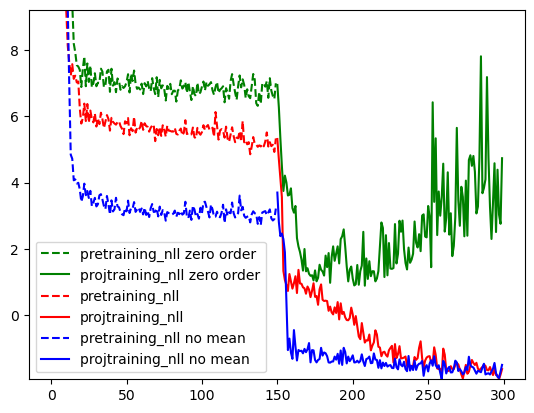

In [11]:
n_samples_pretraining = len(pretraining_nll_vanilla)
n_samples_posttraining = len(posttraining_nll_vanilla)

plt.clf()
plt.plot(range(n_samples_pretraining), pretraining_nll_zero_order, "g--", label="pretraining_nll zero order")
plt.plot(range(n_samples_pretraining, n_samples_pretraining+n_samples_posttraining), posttraining_nll_zero_order, "g", label="projtraining_nll zero order")
plt.plot(range(n_samples_pretraining), pretraining_nll_vanilla, "r--", label="pretraining_nll")
plt.plot(range(n_samples_pretraining, n_samples_posttraining+n_samples_pretraining), posttraining_nll_vanilla, "r", label="projtraining_nll")
plt.plot(range(n_samples_pretraining), pretraining_nll_no_mean, "b--", label="pretraining_nll no mean")
plt.plot(range(n_samples_pretraining, n_samples_posttraining+n_samples_pretraining), posttraining_nll_no_mean, "b", label="projtraining_nll no mean")

y_min = min(min(posttraining_nll_vanilla), min(posttraining_nll_zero_order), min(posttraining_nll_no_mean))
y_max = posttraining_nll_zero_order[5]+5
plt.gca().set_ylim([y_min, y_max])
plt.legend()
plt.show()

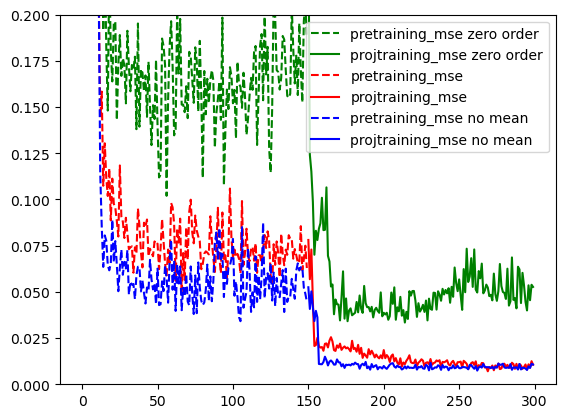

In [13]:
n_samples_pretraining = len(pretraining_mse_vanilla)
n_samples_posttraining = len(posttraining_mse_vanilla)

plt.clf()
plt.plot(range(n_samples_pretraining), pretraining_mse_zero_order, "g--", label="pretraining_mse zero order")
plt.plot(range(n_samples_pretraining, n_samples_pretraining+n_samples_posttraining), posttraining_mse_zero_order, "g", label="projtraining_mse zero order")
plt.plot(range(n_samples_pretraining), pretraining_mse_vanilla, "r--", label="pretraining_mse")
plt.plot(range(n_samples_pretraining, n_samples_posttraining+n_samples_pretraining), posttraining_mse_vanilla, "r", label="projtraining_mse")
plt.plot(range(n_samples_pretraining), pretraining_mse_no_mean, "b--", label="pretraining_mse no mean")
plt.plot(range(n_samples_pretraining, n_samples_posttraining+n_samples_pretraining), posttraining_mse_no_mean, "b", label="projtraining_mse no mean")
plt.gca().set_ylim([0, 0.2])
plt.legend()
plt.show()